# Arctic Basin Classification Regime

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [19]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from NEMO_tools import reporj_NEMOgrid
% matplotlib inline

In [3]:
MAT=scipy.io.loadmat('_data/Exchange/River_class.mat')
lon = MAT['lon_i']
lat = MAT['lat_i']
Class = MAT['River_class_i']
Class_masked =np.ma.masked_where(np.isnan(Class), Class)

In [4]:
name = ['Pechora', 'Ob', 'Yenisey', 'Olenek', 'Yana', 'Indigirka', 'Kolyma', 'Mackenzie', 'Sev. Dvina', 'Lena',\
        'khatanga', 'Taimyra', 'Pyasina', 'Coppermine', 'Back', 'Hayes', 'Thomsen', 'Cunningham', 'Clyde']
lons = [55, 70, 83, 120, 137, 151.5, 162, -135, 40, 127, 107, 100, 87, -115, -95.3, -92, -120, -94, -68.5]
lats = [68.5, 66.5, 71, 73, 71.5, 71.5, 69.5, 69, 65, 73.5, 73.5, 76, 74, 68,67.2, 57, 74, 74, 70.5]

In [5]:
ETOPO2_Arctic=scipy.io.loadmat('_libs/ETOPO2_Arctic.mat')
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']
#
res_unit=5
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1

In [42]:
Regions = ['None [Greenland & Iceland]', 'Cunningham [C. A. Archipelago]', 'Thomsen [C. A. Archipelago]', 'Clyde [C. A. Archipelago]',\
           'Back [C. A. Archipelago]', 'Coppermine [Nunavut]', 'Mackenzie [Beaufort S.]', 'Yukon [Bearing Strait]', 'Kolyma [E. Siberian S.]',\
           'Indigirka [E. Siberian S.]', 'Yana [Laptev Sea]', 'Lena [Laptev Sea]', 'Khatanga [Laptev Sea]', 'Taimyra [Laptev Sea]', \
           'Pyasina [Kara Sea]', 'Yenisey [Kara Sea]', "Ob [Kara Sea]", 'Pechora [Kara Sea]', 'S. Dev. [Barents S.]', \
           'None [Scandinavian P.]']

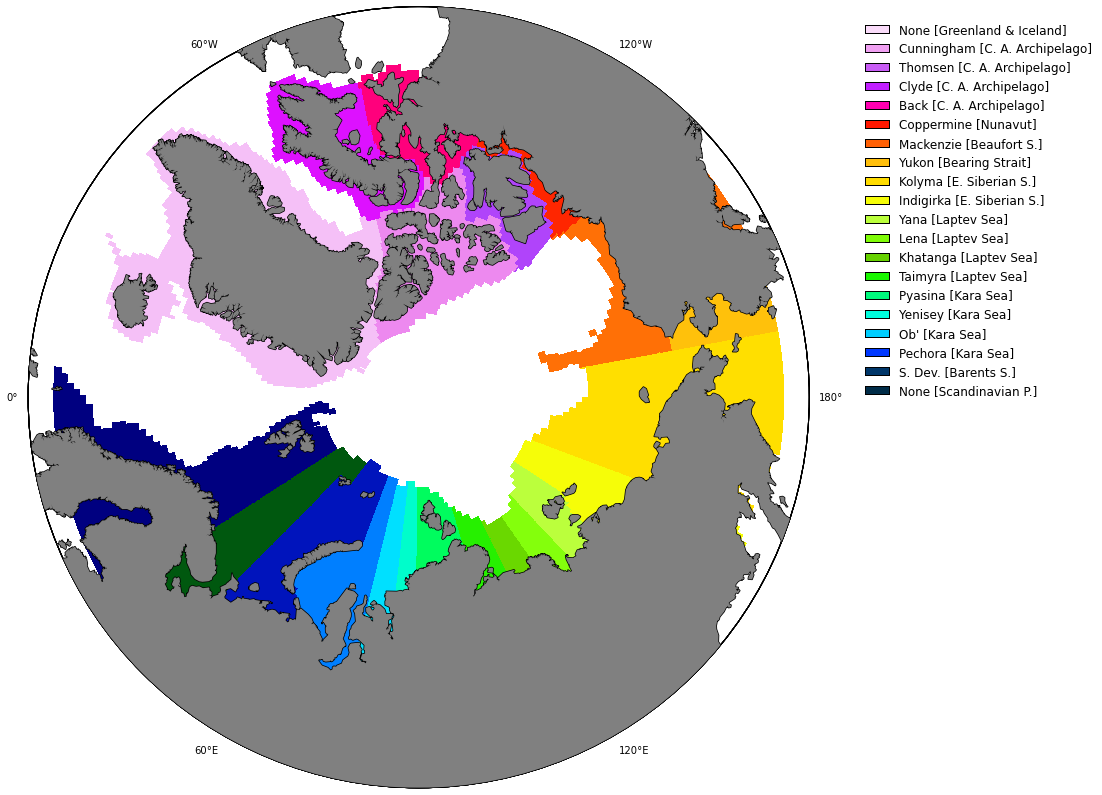

In [7]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=58, lon_0=90, round=True, ax=ax)
proj.drawcoastlines(linestyle='-', color='k', linewidth=1.5, zorder=3)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=3)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90, linewidth=0.0)
topox, topoy = proj(lon_arctic, lat_arctic)
x, y=proj(lon, lat)
# plot
CS=proj.contourf(x, y, Class_masked, 22, cmap=plt.cm.gist_ncar_r)
proj.pcolor(x, y, Class_masked, vmin=0, vmax=21, cmap=plt.cm.gist_ncar_r)
#proj.contour(topox, topoy, topo_arctic, [1000, 2000, 3000], linewidths=1.5, linestyles='-', colors='gray', label='1, 2, 3 km bathymetry')
proxy = [plt.Rectangle((0, 0), 1, 1, fc = pc.get_facecolor()[0]) for pc in CS.collections]
LG=plt.legend(proxy, Regions, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 


# Interpolate to ORCA2

In [8]:
coordinate_name=glob.glob('_data/Exchange/coordinates*.nc')
print("found file: \n{}".format(coordinate_name))
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

found file: 
['_data/Exchange/coordinates.nc']


In [9]:
Class_interp = reporj_NEMOgrid(lon, lat, Class, nav_lon, nav_lat, method='nearest')
Class_range = reporj_NEMOgrid(lon, lat, Class, nav_lon, nav_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan
Class_masked = np.ma.masked_where(np.isnan(Class_interp), Class_interp)

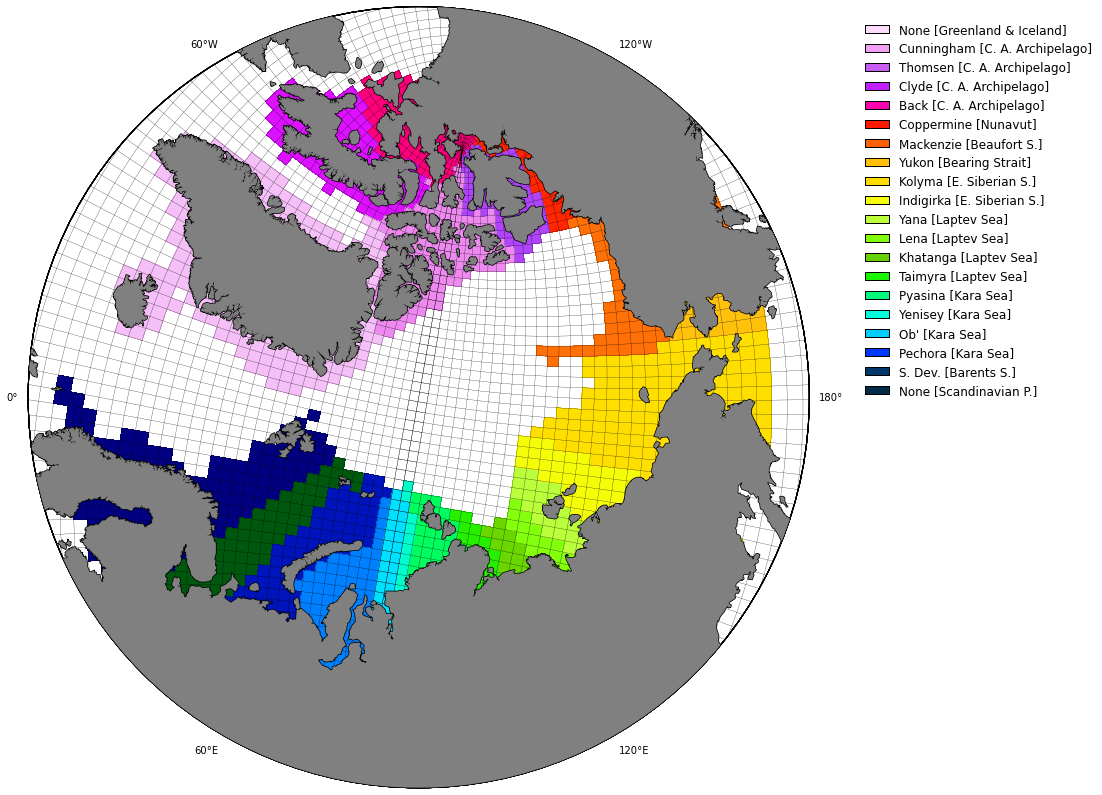

In [10]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=58, lon_0=90, round=True, ax=ax)
proj.drawcoastlines(linestyle='-', color='k', linewidth=1.5, zorder=3)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None, zorder=3)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90, linewidth=0.0)
topox, topoy = proj(lon_arctic, lat_arctic)
x, y=proj(nav_lon, nav_lat)
# plot
CS=proj.contourf(x, y, Class_masked, 22, cmap=plt.cm.gist_ncar_r)
proj.pcolor(x, y, Class_masked, vmin=0, vmax=21, cmap=plt.cm.gist_ncar_r)
proj.plot(x, y, 'k-', lw=0.25); proj.plot(x.T, y.T, 'k-', lw=0.25)
#proj.contour(topox, topoy, topo_arctic, [1000, 2000, 3000], linewidths=1.5, linestyles='-', colors='gray', label='1, 2, 3 km bathymetry')
proxy = [plt.Rectangle((0, 0), 1, 1, fc = pc.get_facecolor()[0]) for pc in CS.collections]
LG=plt.legend(proxy, Regions, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 

In [7]:
id_river  = scipy.io.loadmat('_data/Exchange/River_Ba_nemo.mat')
Ob        = id_river['Ob'][:][0]
Yenisey   = id_river['Yenisey'][:][0]
Lena      = id_river['Lena'][:][0]
Kolyma    = id_river['Kolyma'][:][0]
Mackenzie = id_river['Mackenzie'][:][0]
Yukon     = id_river['Yukon'][:][0]
Indigirka = id_river['Indigirka'][:][0]
Khatanga  = id_river['Khatanga'][:][0]
Pechora   = id_river['Pechora'][:][0]
Pyasina   = id_river['Pyasina'][:][0]
Taimyra   = id_river['Taimyra'][:][0]
Yana      = id_river['Yana'][:][0]
Olenek    = id_river['Olenek'][:][0]
CPM       = id_river['CPM'][:][0]
Back      = id_river['Back'][:][0]
Hayes     = id_river['Hayes'][:][0]
CH        = id_river['CH'][:][0]
Clyde     = id_river['Clyde'][:][0]
Thomsen   = id_river['Thomsen'][:][0]

In [12]:
Ba_ORCA2_2deg = np.zeros([12, 149, 182])

In [13]:
for i in range(12):
    temp = Ba_ORCA2_2deg[i, :, :]
    temp[Class_interp==1] = CH[i] # Greenland
    temp[Class_interp==2] = CH[i]
    temp[Class_interp==3] = Thomsen[i]
    temp[Class_interp==4] = Clyde[i]
    temp[Class_interp==5] = Back[i]
    temp[Class_interp==6] = CPM[i]
    temp[Class_interp==7] = Mackenzie[i]
    temp[Class_interp==8] = Yukon[i]
    temp[Class_interp==9] = Kolyma[i]
    temp[Class_interp==10] = Indigirka[i]
    temp[Class_interp==11] = Yana[i]
    temp[Class_interp==12] = Lena[i]
    temp[Class_interp==13] = Khatanga[i]
    temp[Class_interp==14] = Taimyra[i]
    temp[Class_interp==15] = Pyasina[i]
    temp[Class_interp==16] = Yenisey[i]
    temp[Class_interp==17] = Ob[i]
    temp[Class_interp==18] = Pechora[i]
    temp[Class_interp==19] = Pechora[i] # S. Dev.
    temp[Class_interp==20] = Pechora[i] # Norway
    Ba_ORCA2_2deg[i, :, :] = temp

In [14]:
#save_var = {'nav_lon': nav_lon, 'nav_lat': nav_lat, 'Ba_ORCA2_2deg': Ba_ORCA2_2deg}
#scipy.io.savemat('_data/Exchange/Ba_ORCA2_SRC.mat', mdict=save_var)

# Interpolate to ANHA4

In [8]:
ANHA4_MAT=scipy.io.loadmat('_data/Exchange/coord_ANHA4.mat')
ANHA4_lon=ANHA4_MAT['nav_lon']
ANHA4_lat=ANHA4_MAT['nav_lat']

In [9]:
ANHA4_MAT['nav_lev'][:].shape

(50, 1)

In [10]:
lon = MAT['lon_f']
lat = MAT['lat_f']
Class = MAT['River_class_f']

In [11]:
Class_interp = reporj_NEMOgrid(lon, lat, Class, ANHA4_lon, ANHA4_lat, method='nearest')
Class_range = reporj_NEMOgrid(lon, lat, Class, ANHA4_lon, ANHA4_lat, method='linear')
Class_interp[np.isnan(Class_range)] = np.nan
Class_masked = np.ma.masked_where(np.isnan(Class_interp), Class_interp)

In [12]:
Ba_ANHA4 = np.zeros([12, 544, 800])

In [13]:
for i in range(12):
    temp = Ba_ANHA4[i, :, :]
    temp[Class_interp==1] = 0 # Greenland
    temp[Class_interp==2] = CH[i]
    temp[Class_interp==3] = Thomsen[i]
    temp[Class_interp==4] = Clyde[i]
    temp[Class_interp==5] = Back[i]
    temp[Class_interp==6] = CPM[i]
    temp[Class_interp==7] = Mackenzie[i]
    temp[Class_interp==8] = Yukon[i]
    temp[Class_interp==9] = Kolyma[i]
    temp[Class_interp==10] = Indigirka[i]
    temp[Class_interp==11] = Yana[i]
    temp[Class_interp==12] = Lena[i]
    temp[Class_interp==13] = Khatanga[i]
    temp[Class_interp==14] = Taimyra[i]
    temp[Class_interp==15] = Pyasina[i]
    temp[Class_interp==16] = Yenisey[i]
    temp[Class_interp==17] = Ob[i]
    temp[Class_interp==18] = Pechora[i]
    temp[Class_interp==19] = Pechora[i] # S. Dev.
    temp[Class_interp==20] = Pechora[i] # Norway
    Ba_ANHA4[i, :, :] = temp

In [14]:
MAT = scipy.io.loadmat('_data/Exchange/Ba_boundary_ANHA4.mat')
domain = MAT['domain']

In [15]:
river_name = ['Yukon', 'Pechora', "Ob", 'Yenisey', 'Indigirka', 'Kolyma', 'Mackenzie', 'Sev. Dvina', 'Lena', 'Khatanga', 'Pyasina']
lons = np.array([-158, 52, 66, 84, 148, 159, -135, 40, 127, 102, 88])
lats = np.array([65, 64.5, 65, 69, 70, 68, 68, 64, 70, 71, 75])
info_id = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]

In [16]:
import matplotlib.patches as mpatches

In [21]:
#save_var = { 'Ba_boundary': field_ANHA4, 'domain': domain_ANHA4}
MAT = scipy.io.loadmat('_data/Exchange/Ba_boundary_ANHA4.mat')
field_ANHA4 = MAT['Ba_boundary'][:]
domain_ANHA4 = MAT['domain'][:]
domain_ANHA4[field_ANHA4[0, :, :]>0.5] = 2.0

In [24]:
domain_ANHA4[domain_ANHA4<2.0] = np.nan
domain_ANHA4 = np.ma.masked_where(np.isnan(domain_ANHA4), domain_ANHA4)

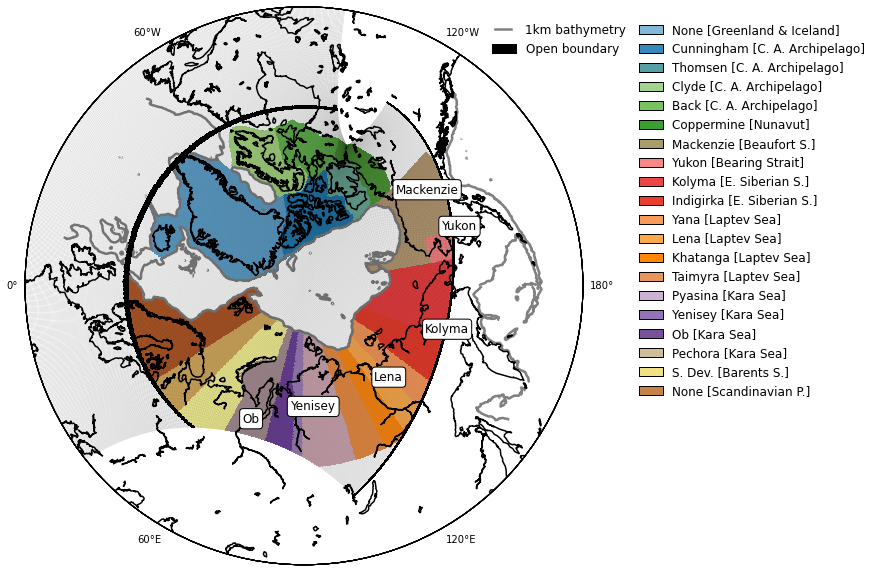

In [43]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=45, lon_0=90, round=True, ax=ax)
proj.drawcoastlines(linestyle='-', color='k', linewidth=1.5, zorder=3)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90, linewidth=0.0)
topox, topoy = proj(lon_arctic, lat_arctic)
x, y=proj(ANHA4_lon, ANHA4_lat)
locx, locy = proj(lons, lats)

CS=proj.contourf(x, y, Class_masked, 22, cmap=plt.cm.Paired)
proj.pcolor(x, y, Class_masked, vmin=0, vmax=21, cmap=plt.cm.Paired)
CS3=proj.pcolor(x, y, domain_ANHA4, cmap=plt.cm.gray_r, vmin=-99, vmax=-98, zorder=3, alpha=1)
CS2 = proj.contour(topox, topoy, topo_arctic, [1000], linewidths=2.5, linestyles='-', colors='gray')
proj.plot(x, y, 'k-', lw=0.25, alpha=0.2); proj.plot(x.T, y.T, 'k-', lw=0.25, alpha=0.2)

for i in range(11):
    if info_id[i] ==1:
        plt.text(locx[i], locy[i], river_name[i], fontsize=12, \
                 bbox=dict(facecolor='w', edgecolor='k', boxstyle='round', alpha=1))

patch = mpatches.Patch(color='k', label='Open boundary')
legend1 = plt.legend([CS2.collections[0]], ['1km bathymetry'], bbox_to_anchor=(1.095, 0.99), frameon=False)
legend2 = plt.legend(handles=[patch], bbox_to_anchor=(1.083, 0.955), frameon=False)
proxy = [plt.Rectangle((0, 0), 1, 1, fc = pc.get_facecolor()[0]) for pc in CS.collections]
LG=ax.legend(proxy, Regions, bbox_to_anchor=(1.07, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 
fig.gca().add_artist(legend1); fig.gca().add_artist(legend2)

fig.savefig('river_class.png', dpi=400, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

In [22]:
#save_var = {'nav_lon': ANHA4_lon, 'nav_lat': ANHA4_lat, 'Ba_ANHA4': Ba_ANHA4}
#scipy.io.savemat('_data/Exchange/Ba_ANHA4_SRC.mat', mdict=save_var)